In [1]:
#self_confining.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'fast_gravity = ', fast_gravity
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'monitor = ', monitor

r.shape =  (551, 2, 241)
total_ring_mass =  2e-09
shear_viscosity =  1e-11
bulk_viscosity =  1.5e-11
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.01, 'e_prime': 0.0}
fast_gravity =  False
e.min() =  0.008239750763023437
e.max() =  0.010927895082923968
monitor =  {'streamline_crossing_timestep': 263720, 'nan_timestep': None}


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  2083.333333333333


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [5]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = orbit_deltas(times, r, a, e, wt)

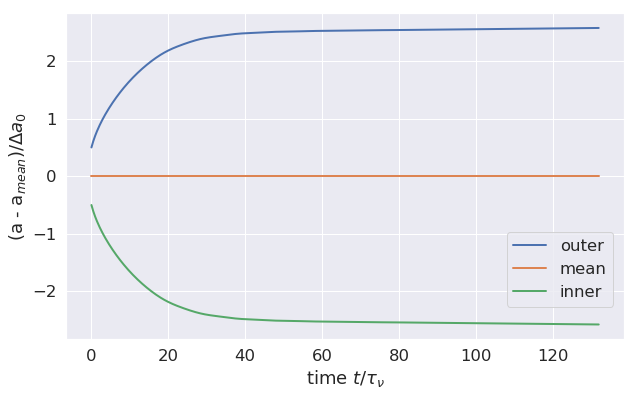

In [6]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.legend(loc=(0.79, 0.1))
plt.savefig('figs/a_nominal.pdf', bbox_inches='tight')

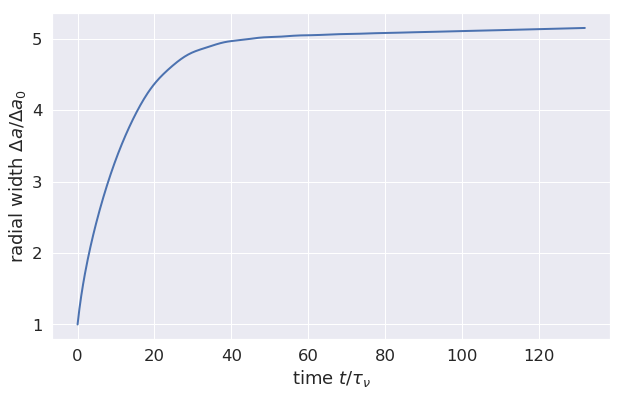

In [7]:
#plot delta_a versus time
x = times_viscous
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
plt.savefig('figs/da_nominal.pdf', bbox_inches='tight')

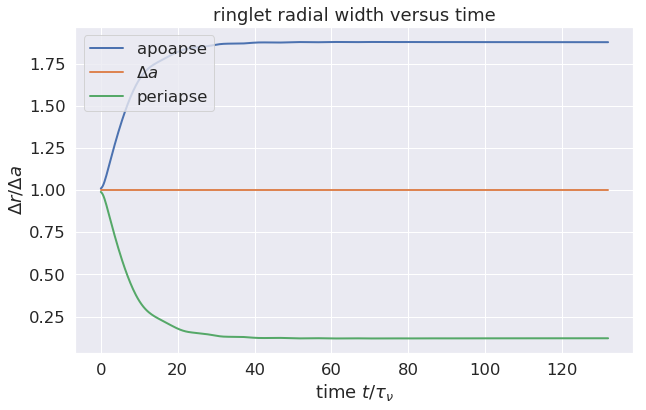

In [8]:
#plot streamline's dr_peri and dr_apo vs time
q_inner = a_inner*(1.0 - e_inner)
q_outer = a_outer*(1.0 - e_outer)
Q_inner = a_inner*(1.0 + e_inner)
Q_outer = a_outer*(1.0 + e_outer)
dr_peri = q_outer - q_inner
dr_apo = Q_outer - Q_inner
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = dr_apo/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='apoapse')
y = da/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta a$')
y = dr_peri/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='periapse')
p = ax.set_title('ringlet radial width versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta r/\Delta a$')
p = ax.legend()

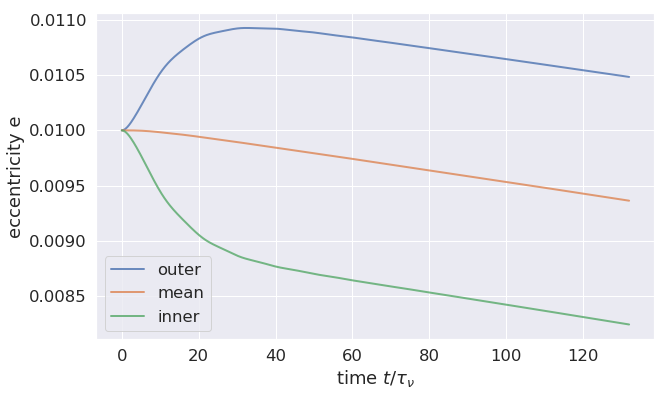

In [9]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()
plt.savefig('figs/e_nominal.pdf', bbox_inches='tight')

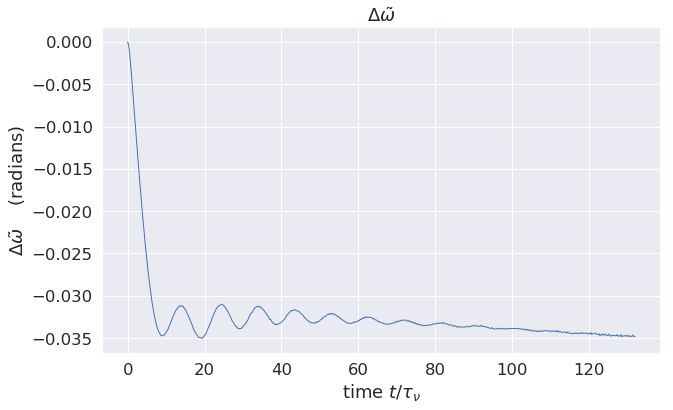

In [10]:
#plot dwt versus time
x = times_viscous
y = dwt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
#p = ax.set_ylim(-0.037, 0.0)

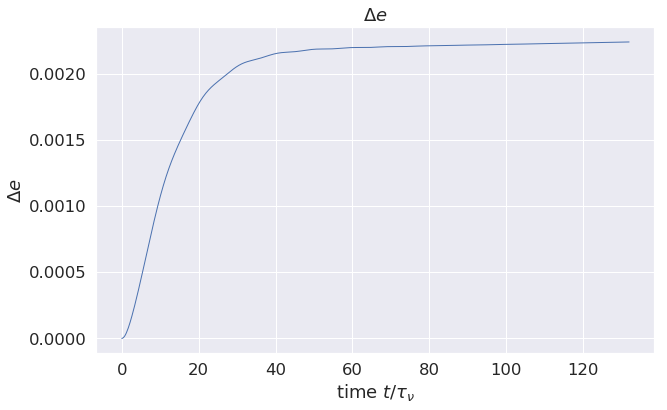

In [11]:
#plot delta_e versus time
x = times_viscous
y = de
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta e$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$')
#p = ax.set_ylim(-0.0001, 0.003)

In [12]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H.mean()

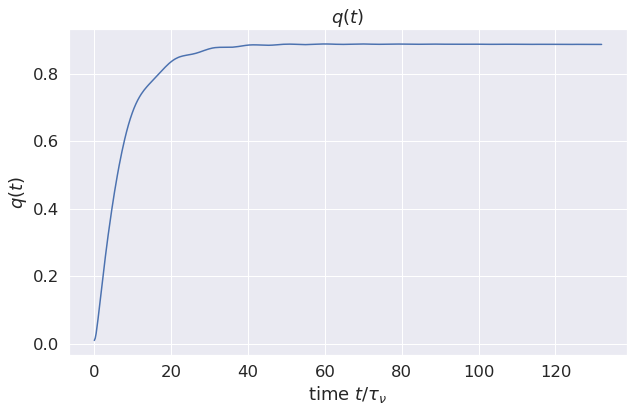

In [13]:
#plot q versus time
x = times_viscous
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$q(t)$')

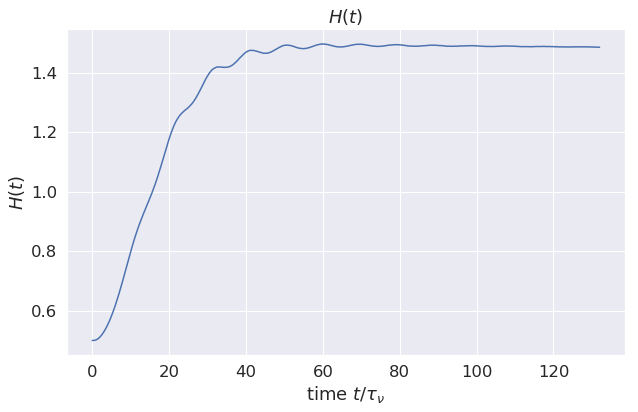

In [14]:
#plot H(q) versus time
x = times_viscous
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$H(t)$')

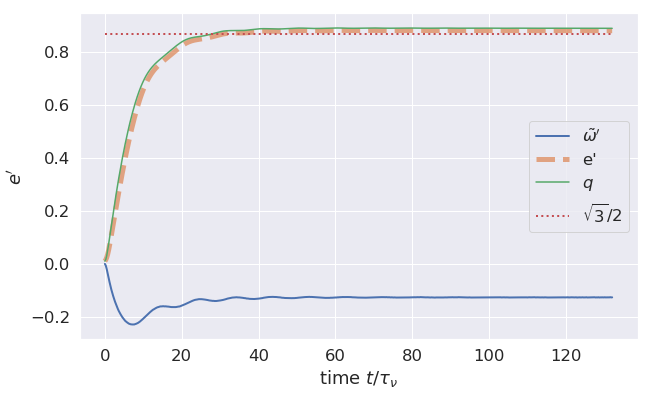

In [15]:
#plot e_prime wt_prime and q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\tilde{\omega}'$")
y = e_prime
p = ax.plot(x, y, linestyle='dashed', linewidth=5, alpha=0.7, label="e'")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=1.5, label=r'$q$', alpha=1)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e'$")
#p = ax.set_ylim(-0.35, 1.05)
p = ax.legend()
plt.savefig('figs/de_prime_nominal.pdf', bbox_inches='tight')

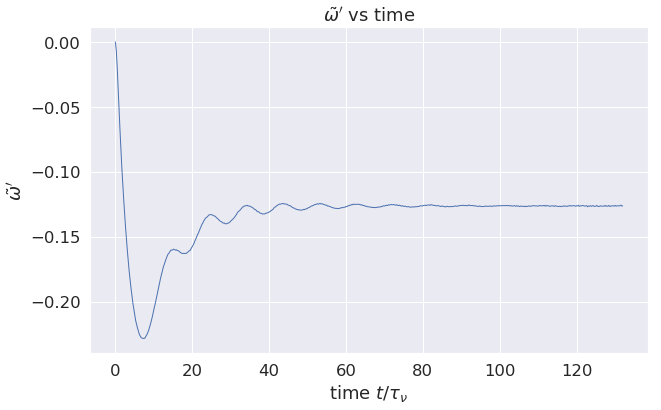

In [16]:
#plot wt_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = ax.set_title(r"$\tilde{\omega}'$ vs time")

In [17]:
for tidx in range(len(times)):
    rt = r[tidx]
    r0 = rt[0]
    r1 = rt[1] - r0
    idx = (r1 < 0)
    if (idx.sum() > 0):
        break
print tidx

538


tidx =  538


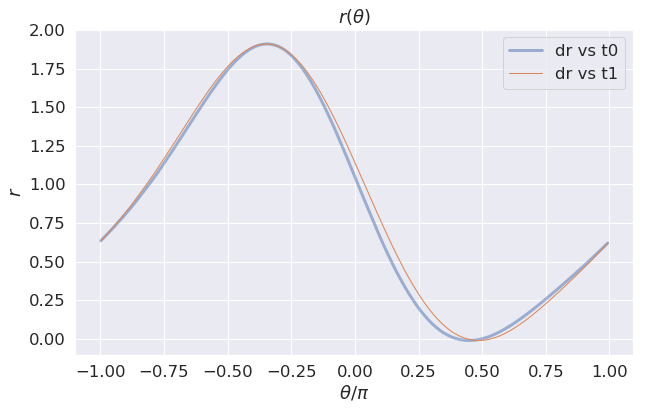

In [18]:
#inspect ringlet's final shape
#tidx = 561
print 'tidx = ', tidx
rt = r[tidx]
t0 = t[tidx][0]
t1 = t[tidx][1]
da = a[tidx][1].mean() - a[tidx][0].mean()
dr = (r[tidx][1] - r[tidx][0])/da
x = t0/np.pi
y = dr
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=3, alpha=0.5, label='dr vs t0')
x = t1/np.pi
p = ax.plot(x, y, linestyle='-', linewidth=1, label='dr vs t1')
p = ax.set_title(r'$r(\theta)$')
p = ax.set_xlabel(r'$\theta/\pi$')
p = ax.set_ylabel(r'$r$')
p = plt.legend()

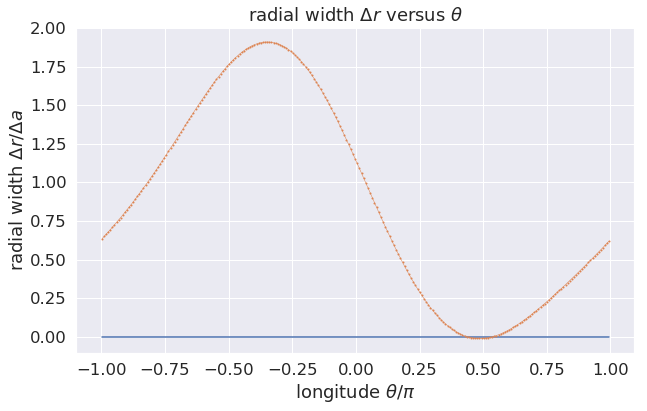

In [19]:
#inspect final radial width versus longitude
rt = r[tidx]
r0 = rt[0]
r1 = rt[1] - r0
r0 = r0 - r0
at = a[tidx]
a0 = at[0]
a1 = at[1]
da = a1.mean() - a0.mean()
tt = t[tidx]
t0 = tt[0]
t1 = tt[1]
f, ax = plt.subplots(figsize=(10, 6))
x = t0/np.pi
y = r0/da
p = ax.plot(x, y, linestyle='-')
x = t1/np.pi
y = r1/da
p = ax.plot(x, y, linestyle='-', linewidth=0.5, marker='.', markersize=2)
p = ax.set_title(r'radial width $\Delta r$ versus $\theta$')
p = ax.set_xlabel(r'longitude $\theta/\pi$')
p = ax.set_ylabel(r'radial width $\Delta r/\Delta a$')

In [20]:
stopit

NameError: name 'stopit' is not defined

In [ ]:
#plot surface density vs longitude
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
plot_times = [0.0, 0.5, 2.0, 4.0, 6.0, 10.0, 50.0]
middle_index = number_of_streamlines/2
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    r_now = r[t_idx]
    t_now = t[t_idx]
    wt_now = wt[t_idx]
    delta_r = delta_f(r_now, t_now)
    sd_now = surface_density(lambda0, delta_r)
    r_middle = r_now[middle_index]
    t_middle = t_now[middle_index]
    wt_middle = wt_now[middle_index]
    sd_middle = sd_now[middle_index]
    pidx = r_middle.argmin()
    wt_min = wt_middle[pidx]
    t_rotating = adjust_angle(t_middle - wt_min)
    if (t_idx == 0):
        sd_initial = sd_now.mean()
    y = sd_middle/sd_initial
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    if (lbl[-1] == '.'):
        lbl = lbl[:-1]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'surface density vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='center right')

In [ ]:
#plot radial cuts of surface density...surface density contrast = 3.462/0.242 = 14.3
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
t_idx = total_number_of_outputs
r_now = r[t_idx]
t_now = t[t_idx]
wt_now = wt[t_idx]
delta_r = delta_f(r_now, t_now)
sd_now = surface_density(lambda0, delta_r)
sd_mean = sd_now.mean()
r_middle = r_now[middle_index]
#sd(r) along periapse
idx = r_middle.argmin()
idx_peri = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/delta_a[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='periapse')
print (yp)
#sd(r) along apoapse
idx = r_middle.argmax()
idx_apo = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/delta_a[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='apoapse')
print (yp)
#sd(r) along quadrature
idx = (idx_peri + idx_apo)/2
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded) - r_profile.mean()
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/delta_a[t_idx]
yp = sd_padded/sd_mean
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='quadrature')
print (yp)
p = ax.set_title(r'radial surface density profiles')
p = ax.set_xlabel(r'radius $(r - r_{mid})/\Delta a$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.legend()
plt.savefig('figs/radial_sigma_nominal.pdf', bbox_inches='tight')

In [ ]:
#compute viscous angular momentum flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
from fluxes import *
viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = \
    calculate_angular_momentum_flux(lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)

In [ ]:
#compute gravitational angular momentum flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = \
    calculate_angular_momentum_flux(lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)

In [ ]:
#viscous angular momentum flux & luminosity for circular ring at time=0
a0 = a_avg[0]
w0 = Omega(J2, Rp, a0)
viscous_flux_circular = 1.5*shear_viscosity*sd_initial*a0*w0
viscous_luminosity_circular = viscous_flux_circular*twopi*a0

In [ ]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravitational')
p = ax.set_ylabel(r'angular momentum luminosity    $L/L_{\nu,0}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()
plt.savefig('figs/angular_momentum_luminosity_nominal.pdf', bbox_inches='tight')

In [ ]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1, label='gravitational')
y = (viscous_angular_momentum_luminosity + grav_angular_momentum_luminosity)/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1, label='total')
p = ax.set_ylabel(r'angular momentum luminosity    $L/L_{\nu,0}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.1, 0.1)
p = ax.legend()
plt.savefig('figs/angular_momentum_luminosity_zoom_nominal.pdf', bbox_inches='tight')

In [ ]:
#plot viscous angular monentum flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    angular_momentum_flux_now = viscous_angular_momentum_flux[t_idx]
    r_now = rc[t_idx]
    t_now = tc[t_idx]
    wt_now = wtc[t_idx]
    pidx = r_now.argmin()
    wt_min = wt_now[pidx]
    t_rotating = adjust_angle(t_now - wt_min)
    y = angular_momentum_flux_now/viscous_flux_circular
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    e_prime_now = e_prime[t_idx]
    lbl = r'$t/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3] + '    e\'= ' + '{:f}'.format(e_prime_now)[0:4]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
    print (lbl + " e' = ", e_prime_now)
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_{\nu, 0}$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.set_xlim(-1.05, 1.05)
p = ax.legend(loc='lower right')
plt.savefig('figs/F_nu_nominal.pdf', bbox_inches='tight')

In [ ]:
#plot final angular monentum fluxes vs longitude
f, ax = plt.subplots(figsize=(10, 6))
angular_momentum_flux_now = viscous_angular_momentum_flux[-1]
r_now = rc[-1]
t_now = tc[-1]
wt_now = wtc[-1]
pidx = r_now.argmin()
wt_min = wt_now[pidx]
t_rotating = adjust_angle(t_now - wt_min)
y = angular_momentum_flux_now/viscous_flux_circular
x = t_rotating/np.pi
idx = np.argsort(t_rotating)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscosity')
angular_momentum_flux_now = grav_angular_momentum_flux[-1]
y = angular_momentum_flux_now/viscous_flux_circular
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravity')
p = ax.set_xlabel(r'relative longitude $\varphi/\pi$')
p = ax.set_ylabel(r'angular momentum flux $F/F_{\nu,0}$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')
plt.savefig('figs/F_vs_longitude_nominal.pdf', bbox_inches='tight')

In [ ]:
#compute viscous energy flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
viscous_energy_flux, viscous_energy_luminosity, rc, tc, wtc = calculate_energy_flux(
    lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)
viscous_energy_flux_circular = viscous_flux_circular*w0
viscous_energy_luminosity_circular = viscous_luminosity_circular*w0

In [ ]:
#compute gravitational energy flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_energy_flux, grav_energy_luminosity, rc, tc, wtc = calculate_energy_flux(
    lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)

In [ ]:
#plot energy luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=3, label='viscous')
y = grav_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=3, label='gravitational')
p = ax.set_title(r'energy luminosity versus time')
p = ax.set_ylabel(r'energy luminosity    $L/L_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()
#p = ax.set_ylim(-0.01, 0.01)

In [ ]:
#plot grav_energy_luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = grav_energy_luminosity
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'gravitational energy luminosity versus time')
p = ax.set_ylabel(r'$L_E$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

In [ ]:
#plot viscous energy flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    viscous_energy_flux_now = viscous_energy_flux[t_idx]
    r_now = rc[t_idx]
    t_now = tc[t_idx]
    wt_now = wtc[t_idx]
    pidx = r_now.argmin()
    wt_min = wt_now[pidx]
    t_rotating = adjust_angle(t_now - wt_min)
    y = viscous_energy_flux_now/viscous_energy_flux_circular
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous energy flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous energy flux $F_E/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')

In [ ]:
#plot final energy fluxes vs longitude
f, ax = plt.subplots(figsize=(10, 6))
energy_flux_now = viscous_energy_flux[-1]
r_now = rc[-1]
t_now = tc[-1]
wt_now = wtc[-1]
pidx = r_now.argmin()
wt_min = wt_now[pidx]
t_rotating = adjust_angle(t_now - wt_min)
y = energy_flux_now/viscous_energy_flux_circular
x = t_rotating/np.pi
idx = np.argsort(t_rotating)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscosity')
energy_flux_now = grav_energy_flux[-1]
y = energy_flux_now/viscous_energy_flux_circular
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravity')
p = ax.set_title(r'energy flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'energy flux $F/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='lower right')